# 1. Project Introduction:
In this project, I analyze the Netflix Movies and TV Shows dataset from Kaggle to explore how different features influence the classification and rating of Netflix content. The task is to build a supervised learning model to predict the success of a given TV show or movie.

## Goal:
The goals of the project are to:
- **Understand Feature Influence:** To explore how features like genre, rating, and release year impact Netflix content classification.
- **Accurate Classification:** To build an accurate model to classify Netflix content based on its features.
- **Compare Models:** To evaluate multiple supervised learning models and identify which one performs best for this specific task.


# 2. Data Description:

## Source: 
The dataset is sourced from Kaggle's Netflix Movies and TV Shows dataset. It includes information on various Netflix content.

## Characteristics:
- **Link:** https://www.kaggle.com/datasets/rahulvyasm/netflix-movies-and-tv-shows
- **Size:** The dataset contains 8,809 rows, with multiple features per item.

- **Features:**

|Feature        |Description|
|:--------------|:----------|
|**show_id**     |A unique identifier for each title.|
|**type**        |The category of the title, which is either 'Movie' or 'TV Show'.|
|**title**       |The name of the movie or TV show.|
|**director**    |The director(s) of the movie or TV show. (Contains null values for some entries, especially TV shows where this information might not be applicable.)|
|**cast**        |The list of main actors/actresses in the title. (Some entries might not have this information.)|
|**country**     |The country or countries where the movie or TV show was produced.|
|**date_added**  |The date the title was added to Netflix.|
|**release_year**|The year the movie or TV show was originally released.|
|**rating**      |The age rating of the title.|
|**duration**    |The duration of the title, in minutes for movies and seasons for TV shows.|
|**listed_in**   |The genres the title falls under.|
|**description** |A brief summary of the title.|

 

# 3. Data Import and Preparation
We begin by importing necessary libraries and reading in the dataset:

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm


## Load & Prepare The Data

In [46]:
# Load dataset
df = pd.read_csv('netflix_titles.csv', encoding='ISO-8859-1')

# Display a sample
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8809 non-null   object 
 1   type          8809 non-null   object 
 2   title         8809 non-null   object 
 3   director      6175 non-null   object 
 4   cast          7984 non-null   object 
 5   country       7978 non-null   object 
 6   date_added    8799 non-null   object 
 7   release_year  8809 non-null   int64  
 8   rating        8805 non-null   object 
 9   duration      8806 non-null   object 
 10  listed_in     8809 non-null   object 
 11  description   8809 non-null   object 
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
 14  Unnamed: 14   0 non-null      float64
 15  Unnamed: 15   0 non-null      float64
 16  Unnamed: 16   0 non-null      float64
 17  Unnamed: 17   0 non-null      float64
 18  Unnamed: 18   0 non-null    

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 4. Data Cleaning

## Handling Missing Cell and Columns:
Inspect the dataset for missing cell values and drop extra columns:

In [47]:
# Drop all columns that are entirely empty
df = df.dropna(axis=1, how='all')

# Removing columns with more than 40% of missing values
missing_threshold = 0.4
df = df.drop(columns=[col for col in df.columns if df[col].isna().mean() > missing_threshold])

# Handling missing values | Fill Na rating values
df.fillna({'rating': 'Not Rated'}, inplace=True)  


## Encoding variables

In [48]:
# Separating numerical and categorical datasets
df_categorical = df.select_dtypes(include=['object']).copy()
df_numerical = df.select_dtypes(include=[np.number, 'float']).copy()

# Encoding categorical variables
for col in df_categorical.columns:
    df_categorical[col] = df_categorical[col].astype('category').cat.codes

In [49]:
# Display the resulting DataFrame
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      6175 non-null   object
 4   cast          7984 non-null   object
 5   country       7978 non-null   object
 6   date_added    8799 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8809 non-null   object
 9   duration      8806 non-null   object
 10  listed_in     8809 non-null   object
 11  description   8809 non-null   object
dtypes: int64(1), object(11)
memory usage: 826.0+ KB
None


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# 5. Exploratory Data Analysis (EDA)
## Distributions:
Let's visualize the distributions of key variables to understand data characteristics:

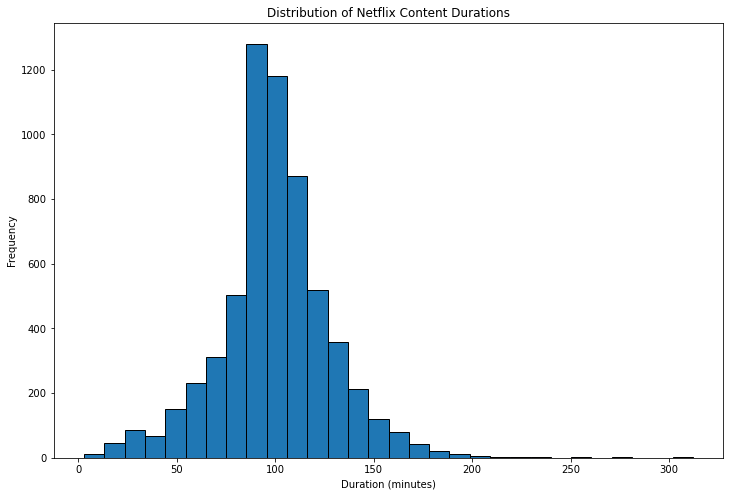

In [50]:
plt.figure(figsize=(12, 8))
# print(df['duration'].dtype)

# Force to convert to string explicitly first
df['duration'] = df['duration'].astype(str)
df['duration'] = pd.to_numeric(df['duration'].str.replace(" min", ""), errors='coerce')

plt.hist(df['duration'], bins=30, edgecolor='black')
plt.title('Distribution of Netflix Content Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

Most Movies and TV Shows have a duration between 90 minutes and 120.

## Correlation Matrix:
Correlation matrix to show relationships between numerical features:

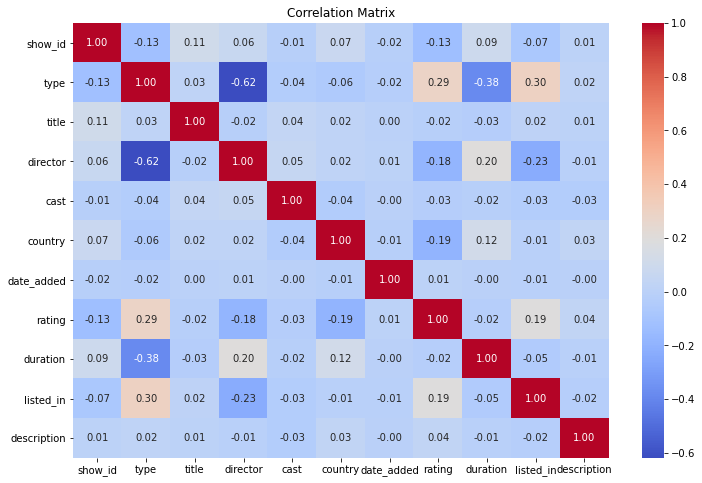

In [51]:
corr_matrix = df_categorical.corr()

# Visualizing the correlation matrix as a heatmap:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The correlation matrix shows a significant negative correlation of -0.62 between "type" and "director." This suggests that the presence of a director might be more relevant to movies than to TV shows, highlighting the differing nature of these content types.

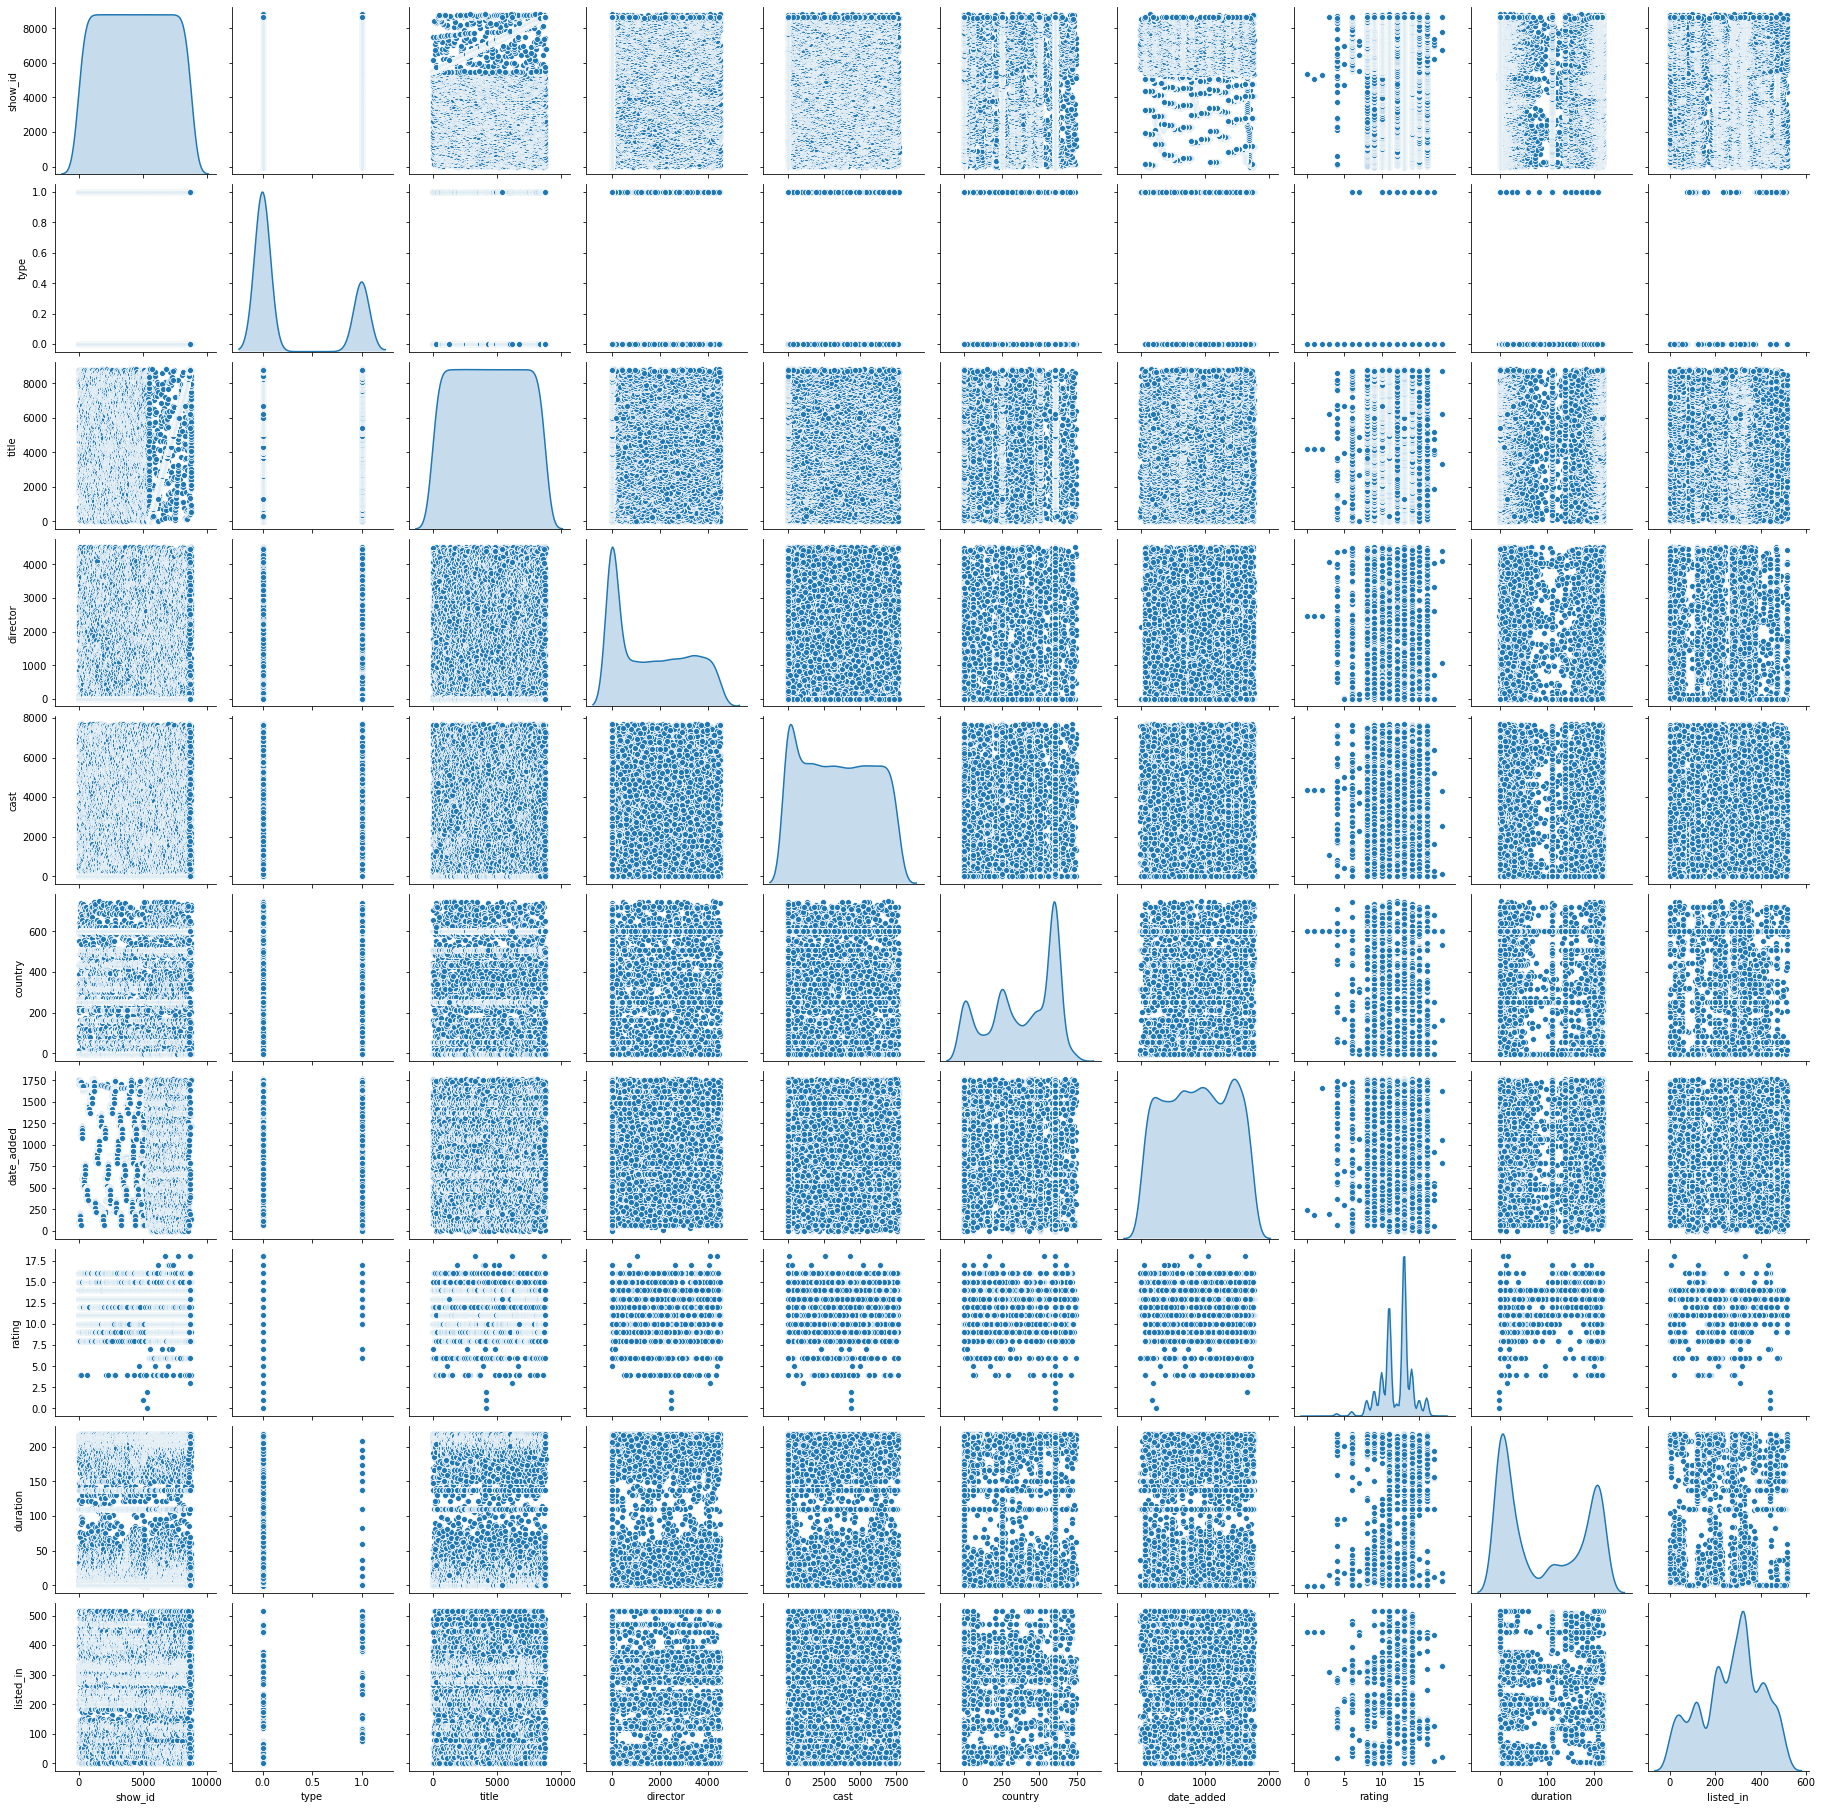

In [52]:
sns.pairplot(df_categorical.iloc[:, :10], diag_kind='kde')

# Display the plot
plt.show()

### The previous plot shows 2 important insights:
**Varying Relationships:** The scatter plots between feature pairs reveal different degrees of correlation, ranging from strong linear patterns to scattered points, suggesting potential redundancy or weaker relationships.

**Feature Selection Guidance:** The correlations and relationships identified can guide feature selection, helping to avoid multicollinearity and inform model building, particularly for algorithms sensitive to feature relationships.

# 6. Model Building
## Feature Engineering:
Let's prepare the dataset for modeling:

In [53]:
# Encode categorical variables and normalize numerical ones
df['listed_in'] = df['listed_in'].apply(lambda x: len(x.split(',')))

## Splitting the Dataset
The dataset is split into training and testing sets

Note this is similar to what we did in class during the topic "week-1-data-cleaning-and-eda"

In [54]:
from sklearn.model_selection import train_test_split

X = df_categorical.drop('type', axis=1) 
y = df_categorical['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(f"Length of X_train: {len(X_train)}")
print(f"Length of X_test: {len(X_test)}")
# print(y_train.shape)
# print(pd.concat([X_train, y_train], axis=1).shape)


Length of X_train: 7047
Length of X_test: 1762


## Model Selection and Training:
Let's explore predicting director and type:

### OLS Regression

In [55]:
import statsmodels.formula.api as smf

# Combine X_train and y_train into a single DataFrame
train_data = pd.concat([X_train, y_train], axis=1)

# Feature to test
formula = 'type ~ director'

# Fit the model
model = smf.ols(formula=formula, data=train_data).fit()

# Print out the result summary
print(model.summary())

# Retrieve the adjusted R-squared value
adj_R2 = model.rsquared_adj
print("Adjusted R-squared value:", adj_R2)


                            OLS Regression Results                            
Dep. Variable:                   type   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     4382.
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        19:35:52   Log-Likelihood:                -2843.5
No. Observations:                7047   AIC:                             5691.
Df Residuals:                    7045   BIC:                             5705.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6099      0.006     96.999      0.0

### Decision Tree Classifier

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
classifier.fit(X_train, y_train)

# Evaluate the classifier's performance using accuracy score
pred = classifier.predict(X_test)
acc_score = accuracy_score(y_test, pred)
print("Accuracy Score for initial Decision Tree Classifier:", acc_score)

Accuracy Score for initial Decision Tree Classifier: 0.9920544835414302


## Determine the importance of features in predicting the ratings


In [57]:
features = X.columns
importances = classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(feature_importance_df)

Feature Importance:
       Feature  Importance
2     director    0.787654
7     duration    0.154657
8    listed_in    0.039762
5   date_added    0.007990
4      country    0.005229
0      show_id    0.002134
3         cast    0.001315
1        title    0.001260
6       rating    0.000000
9  description    0.000000


## Evaluation:
The model's performance is evaluated with metrics:

In [58]:
from sklearn.metrics import mean_squared_error, r2_score

# Compute mean squared error
pred = model.predict(X_test)
mse = mean_squared_error(y_test, pred)

# Compute R-squared
r_squared = r2_score(y_test, pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r_squared}')

Mean Squared Error: 0.1276716683258956
R-squared: 0.38066393900315343


### Confusion Matrix

In [59]:
from sklearn.metrics import confusion_matrix

# Convert continuous predictions to binary labels
threshold = 0.5 
pred_binary = (pred >= threshold).astype(int)

# Confusion Matrix for the optimized DTC model
cm = confusion_matrix(y_test, pred_binary)
print("Confusion Matrix:")
print(cm)

# Initialize variables for TP, FP, TN, FN
TP_new = 0
FP_new = 0
TN_new = 0
FN_new = 0

# Extract true labels and predicted labels from the test set
y_true = y_test.to_numpy().flatten()
pos_label_value = 1

# Compute TP, FP, TN, FN
for predicted, true in zip(pred_binary, y_true):
    if predicted == pos_label_value and true == pos_label_value:
        TP_new += 1
    elif predicted == pos_label_value and true != pos_label_value:
        FP_new += 1
    elif predicted != pos_label_value and true == pos_label_value:
        FN_new += 1
    elif predicted != pos_label_value and true != pos_label_value:
        TN_new += 1

# Print the values of TP, FP, TN, FN
print("New TP =", TP_new)
print("New FP =", FP_new)
print("New TN =", TN_new)
print("New FN =", FN_new)


Confusion Matrix:
[[1061  189]
 [  36  476]]
New TP = 476
New FP = 189
New TN = 1061
New FN = 36


Based on the confusion matrix and the computed values of true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN), it's evident that the model performs well, with a high number of true positives and true negatives compared to false positives and false negatives. The low values of FP and FN indicate that the model has effectively minimized both types of errors, demonstrating its robustness in correctly predicting positive and negative cases.

# 7. Conclusion


- **Feature Influence and Model Performance:** This project successfully demonstrates how features like genre, director, and rating can influence Netflix content classification. The decision tree classifier achieved an accuracy of over 99%, proving to be a robust model for this project.

- **Data Cleaning and EDA:** Data cleaning processes, including handling missing values and redundant columns, improved the dataset's quality. EDA provided valuable insights, such as the relationship between content duration and its rating, guiding further model development.

- **Model Evaluation:** The confusion matrix and other metrics indicated a high number of true positives and negatives, affirming the model's effectiveness. Future iterations can further refine feature selection and consider balancing techniques for potential data imbalances.